#  COVID-19 outbreak in an enclosed environment

## Background

An FPSO (Floating production storage and offloading) vessel is a floating production system that is perfectly "enclosed" but needs regular exchange of staffs. It has strict operation schedules and regulations, and has to stop production if it becomes understaffed due to an outbreak of COVID-19. 

## Assumptions

1. The FPSO has 64 staff, with one carrier of the SARS-CoV-2 virus.
2. The carrier was recently introduced and did not show any symptom upon arrival.
3. Anyone who shows symptom will be removed from the FPSO.

We are interested in knowning:

1. How likely that an outbreak will happen.
2. Is it enough to remove any symptomatic case.
3. Statistics such as how likely a second case will happen after the removal of the first.

## Simulation of outbreaks

This scenario can be simulated with the following command:

```
outbreak_simulator --popsize 64  --infectors 0 --leadtime asymptomatic --repeats 10000 --handle-symptomatic remove
```
where

* `--popsize` is the population size
* `--infector` is the individual with the virus, 0 is its ID.
* `--leadtime asymptomatic` means the individual could be in any stage of infection, as long as he or she does not show any symptom.
* `--handle-symptomatic remove` removes individuals as soon as he or she shows symptom.

We use default options for other key parameters, which includes

* `--sympatomatic-r0`: production number (average number of individuals an infected individual will infect) from `1.4` to `2.8`
* `--asymptomatic-r0`: production number of asymptomatic cases from `0.28 to `0.56`.
* `--prop-asym-carriers`: proportion of asymptomatic carriers in a simulation, range from `0.2` to `0.4`


In [1]:
outbreak_simulator --popsize 64  --infectors 0 --leadtime asymptomatic --repeats 10000 \
    --handle-symptomatic remove --logfile enclosed.log > enclosedFPSO_base.txt

100%|████████████████████████████████████| 10000/10000 [00:15<00:00, 634.06it/s]



## Results

### Distribution of duration of outbreak vs remaining population size

Just to show the overall results of simulations, the following figures display the duration of outbreak (x-axis) vs the remaining population size (y-axis) for a few scenarios. 

In [1]:
library(ggplot2)
library(ggExtra)

plot_time_vs_size <- function(data_file, title) {
    data = read.table(data_file, sep='\t', header=1)
    end_count = data[data['event'] == 'END',]
    end_count$target = as.numeric(as.character(end_count$target))
   
    title = paste0('\nDuration vs Remaining Popsize (', title, ')')
  
    p <- ggplot(end_count, aes(x=time, y=target)) + geom_point(size=0.2, color='slateblue') + theme(legend.position="none") +
      xlab('Days') + ylab('Remaining Population Size') + ggtitle(title)
    
    p1 <- ggMarginal(p, type="histogram", 
                    xparams=list(bins=120),
                    yparams=list(bins=24),
                    fill = "slateblue",
                    color="slateblue"
                    ) 
    print(p1)    
}


For example, the the first version of the simulation script, there is a clear lognormal shaped distribution for duration of outbreaks, which indicates the first outbreak will happen around 5 days after the introduction of the seed carrier, and there are likely second and third outbreaks.

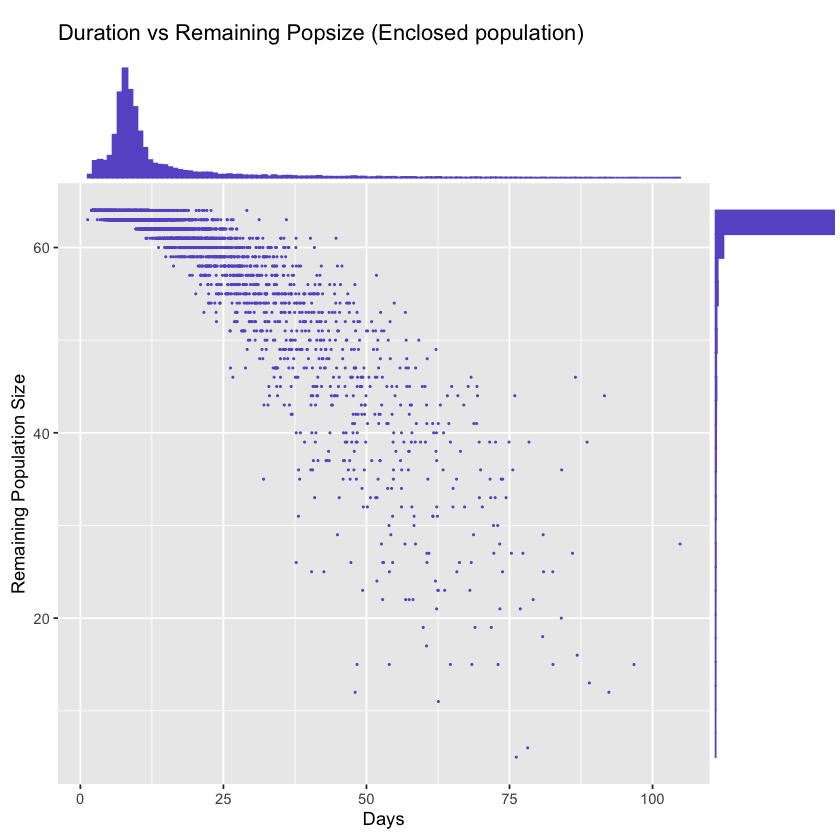

In [2]:
plot_time_vs_size('enclosed.log', 'Enclosed population')

### Probability of outbreak

The output from the simulator has a large number of summary statistics.

In [4]:
import pandas as pd
stat = pd.read_csv('enclosed.txt', sep='\t', index_col=0)

In [5]:
%expand 

## Probability of outbreak

Whether or not an outbreak has happened depend on the definition of outbreak. If we define no outbreak as no one has shown symptom (and not removed), 
{stat.loc['n_remaining_popsize_64'][0]} out of 10000 simulations have a remaining population size of 64. Therefore **the probability that an 
outbreak will happen is {1-int(stat.loc['n_remaining_popsize_64'][0])/10000:.2f}**, which should correspond to the proportion of simulations
with the introduction of asymptomatic cases (`30%`), and only a small proportion of these cases have infected others and caused an outbreak.

If we define no outbreak as no symptomatic case, or no more cases (and everything returnes to normal) after the removal of the first symptomatic
case, {stat.loc['n_remaining_popsize_63'][0]} out of 10000 simulations have a remaining population size of 63. Therefore **the probability that
an outbreak will happen and spread to others is {1-int(stat.loc['n_remaining_popsize_64'][0])/10000-int(stat.loc['n_remaining_popsize_63'][0])/10000:.2f}.**


## Probability of outbreak

Whether or not an outbreak has happened depend on the definition of outbreak. If we define no outbreak as no one has shown symptom (and not removed), 
2116 out of 10000 simulations have a remaining population size of 64. Therefore **the probability that an 
outbreak will happen is 0.79**, which should correspond to the proportion of simulations
with the introduction of asymptomatic cases (`30%`), and only a small proportion of these cases have infected others and caused an outbreak.

If we define no outbreak as no symptomatic case, or no more cases (and everything returnes to normal) after the removal of the first symptomatic
case, 5757 out of 10000 simulations have a remaining population size of 63. Therefore **the probability that
an outbreak will happen and spread to others is 0.21.**


In [6]:
%expand
### Is removal of symptomatic case enough to stop the outbreak?

We have learned that in {stat.loc['n_remaining_popsize_63'][0]} out of 10000 simulations removal of the first symptomatic case
actually stopped the spread of the virus (or the virus has spread but no more symptomatic cases would happen). However, among all
simulations, despite prompt removal of symptomatic cases, {stat.loc['n_second_symptom'][0]} has a second symptomatic case,
and {stat.loc['n_third_symptom'][0]} have a third symptomatic case. That is to say, **in 
{int(stat.loc['n_second_symptom'][0])/int(stat.loc['n_first_symptom'][0])*100:.1f}% cases, there would be a second case
after the removal of the first symptomatic one, so removal of symptomatic case is unlikely to stop an outbreak**.

### Is removal of symptomatic case enough to stop the outbreak?

We have learned that in 5757 out of 10000 simulations removal of the first symptomatic case
actually stopped the spread of the virus (or the virus has spread but no more symptomatic cases would happen). However, among all
simulations, despite prompt removal of symptomatic cases, 1536 has a second symptomatic case,
and 1187 have a third symptomatic case. That is to say, **in 
67.7% cases, there would be a second case
after the removal of the first symptomatic one, so removal of symptomatic case is unlikely to stop an outbreak**.


## Availability

This notebook is available under the `Applications` directory of the [GitHub repository](https://github.com/ictr/covid19-outbreak-simulator) of the COVID19 Outbreak Simulator. It can be executed with [`sos-papermill`](https://github.com/vatlab/sos-papermill) with the following parameters, or using a docker image `bcmictr/outbreak-simulator-notebook` as described in [here](/covid19-outbreak-simulator/docs/cli/).